In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf
import scipy.constants as sc

低斜视角RDA

In [ ]:
R_etac = 20e+3
Vr = 150
Tr = 2.5e-6
Kr = 20e+12
f0 = 5.3e+09
delta_fdop = 80
Fr = 60e+6
Fa = 100
N_az = 256
N_rg = 320
theta_sqc = 3.5*np.pi/180
eta_c = -8.1
f_etac = 320

In [17]:
theta_rc = np.arcsin(-eta_c*Vr/R_etac)

#total time of range
T_rg = N_rg/Fr
#total time of azimuth
T_az = N_az/Fa
print('Trg:',T_rg,'Taz:',T_az)

La = 0.886*2*Vr*np.cos(theta_rc)/delta_fdop 

R_0 = np.sqrt(R_etac**2 - (Vr*eta_c)**2)#零多普勒面斜距
print('R0:',R_0)
eta = np.linspace(-T_az/2,T_az/2 - T_az/N_az,N_az)
tau = np.linspace(-T_rg/2,T_rg/2 - T_rg/N_rg,N_rg) 
eta = eta.reshape(N_az,1)
tau = tau.reshape(1,N_rg)

print(R_0*np.tan(theta_sqc)/Vr)

Trg: 5.333333333333334e-06 Taz: 2.56
R0: 19963.96754154845
8.140323756268838


etac_B: -7.666666666666667 etac_C: -7.666666666666667
[-0.33333333  0.33333333  0.37340553]
La: 3.316514107839736
theta_bw: 0.015111121801284691


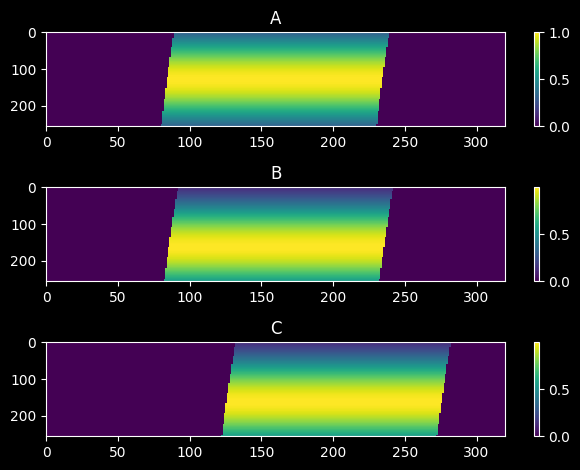

In [18]:
eta_array = eta + eta_c







# R_0_B = np.sqrt(R_0**2 + (Vr*(eta_c-eta_B_c))**2)
R_0_B = R_0             #zero doppler slant of B point
R_0_C = R_0 + 100       #zero doppler slant of C point
A_a = -50
B_a = 50
C_a = B_a + (R_0_C - R_0_B) * np.tan(theta_rc)
NPosition = [A_a, B_a, C_a]  #方位向位置
R = [R_0, R_0_B, R_0_C]
Tar_t_eta_0 = np.zeros(3)
Tar_t_eta_c = np.zeros(3)
for i in range(3):
    Tar_t_eta_0[i] = NPosition[i] / Vr   #最近邻时间

for i in range(3):
    DeltaX = NPosition[i] -R[i] * np.tan(theta_rc)
    Tar_t_eta_c[i] = DeltaX / Vr        #波束中心时间
eta_B_c = Tar_t_eta_c[1]
eta_C_c = Tar_t_eta_c[2]
print('etac_B:',eta_B_c,'etac_C:',eta_C_c)

print(Tar_t_eta_0)


theta_bw = 0.886*sc.c/f0/La
print('La:',La)
print('theta_bw:',theta_bw)
# np.sinc(0.886*np.atan(Vr*(eta_array-eta_c)/R_0)/theta_bw)
# S_2d_A = rectan*np.sinc(eta_array-eta_c)**2*np.exp(-1j*4*np.pi*R_eta*f0/sc.c)\
#         *np.exp(1j*np.pi*Kr*(tau-2*(R_eta-R_etac)/sc.c)**2)

# 方位向上以波束中心时间为中点，时间跨度为eta，注意eta_array以eta_c为中点
R_eta_A = np.sqrt(R_0**2 + (Vr*(eta_array-Tar_t_eta_0[0]))**2)  
R_eta_B = np.sqrt(R_0_B**2 + (Vr*(eta_array-Tar_t_eta_0[1]))**2)  
R_eta_C = np.sqrt(R_0_C**2 + (Vr*(eta_array-Tar_t_eta_0[2]))**2)  

rectan_A = (np.abs(tau-2*(R_eta_A-R_etac)/sc.c)<=Tr/2)

#eta_array为图像方位向时间跨度, eta_c为实际图像波束中心时间
#tau + 2*R_etac/sc.c为图像距离向时间跨度, R_eta_ABC为对应点目标中心距离向时间
S_2d_A= rectan_A*np.sinc(0.886*np.arctan(Vr*(eta_array-eta_c)/R_0)/theta_bw)**2*np.exp(-1j*4*np.pi*R_eta_A*f0/sc.c)\
          *np.exp(1j*np.pi*Kr*(tau-2*(R_eta_A-R_etac)/sc.c)**2)


rectan_B = (np.abs(tau-2*(R_eta_B-R_etac)/sc.c)<=Tr/2)
rectan_C = (np.abs(tau-2*(R_eta_C-R_etac)/sc.c)<=Tr/2)

S_2d_B = rectan_B*np.sinc(0.886*np.arctan(Vr*(eta_array-eta_B_c)/R_0_B)/theta_bw)**2*np.exp(-1j*4*np.pi*R_eta_B*f0/sc.c)\
        *np.exp(1j*np.pi*Kr*(tau-2*(R_eta_B-R_etac)/sc.c)**2)
S_2d_C = rectan_C*np.sinc(0.886*np.arctan(Vr*(eta_array-eta_C_c)/R_0_C)/theta_bw)**2*np.exp(-1j*4*np.pi*R_eta_C*f0/sc.c)\
        *np.exp(1j*np.pi*Kr*(tau-2*(R_eta_C-R_etac)/sc.c)**2)

plt.figure()
plt.subplot(3,1,1)
plt.pcolormesh(np.abs(S_2d_A))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('A')
plt.colorbar()

plt.subplot(3,1,2)
plt.pcolormesh(np.abs(S_2d_B))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('B')
plt.colorbar()

plt.subplot(3,1,3)
plt.pcolormesh(np.abs(S_2d_C))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('C')
plt.colorbar()


plt.tight_layout()
plt.show()


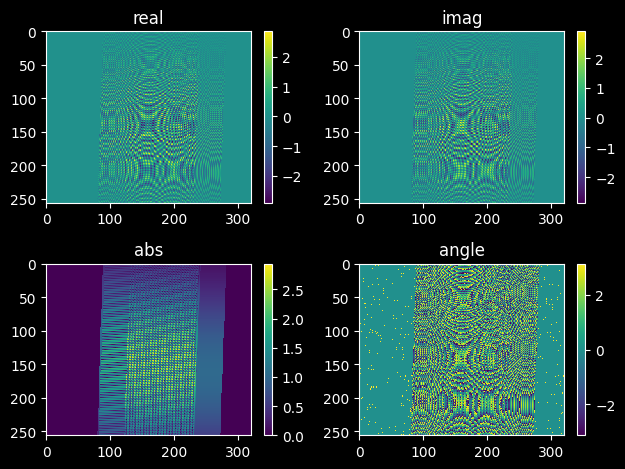

In [19]:
S_2d = S_2d_A + S_2d_B + S_2d_C
# S_2d = S_2d_A + S_2d_C
# S_2d = S_2d_B + S_2d_C
plt.figure()
plt.subplot(2,2,1)
plt.pcolormesh(np.real(S_2d))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('real')
plt.colorbar()

plt.subplot(2,2,2)
plt.pcolormesh(np.imag(S_2d))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('imag')
plt.colorbar()

plt.subplot(2,2,3)
plt.pcolormesh(np.abs(S_2d))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('abs')
plt.colorbar()

plt.subplot(2,2,4)
plt.pcolormesh(np.angle(S_2d))
bottom,top = plt.ylim()
plt.ylim(top,bottom)
plt.title('angle')
plt.colorbar()

plt.tight_layout()
plt.show()

距离压缩

N_range_fft: 320 N_azimuth_fft: 256


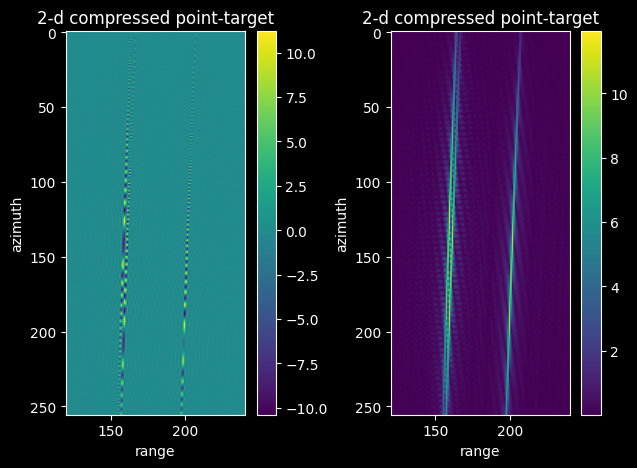

In [20]:
index = (tau<Tr/2)*(tau>=-Tr/2)
index = np.where(index ==True)
# print(index[1])
x_chirp = np.exp(1j*np.pi*Kr*(tau[0,index[1]])**2)

# N_range_fft = int(2**np.ceil(np.log2(N_rg)))
# N_azimuth_fft = int(2**np.ceil(np.log2(N_az)))

N_range_fft = N_rg
N_azimuth_fft = N_az


print('N_range_fft:',N_range_fft,'N_azimuth_fft:',N_azimuth_fft)

# S_2d_rf = sf.fft(S_2d,N_range_fft,axis=1)
# # h_2_fft = np.conjugate(sf.fft(x_chirp,N_range_fft))

Bw = abs(Kr)*Tr
f_rg = np.fft.fftshift(np.linspace(-Fr/2, Fr/2 - Fr/N_range_fft, N_range_fft))
f_rg -= np.round((f_rg - 0) / Fr) * Fr


# h_2_fft = (abs(f_rg)<=Bw/2)*np.exp(1j*np.pi*f_rg**2/Kr)

# S_mf = sf.ifft(S_2d_rf*h_2_fft,axis=1)

window = ss.get_window(window=('kaiser',0),Nx=N_rg)  # 时域窗
Window = np.fft.fftshift(window)  # 频域窗
Hrf = (np.abs(f_rg) <= Bw/2) * Window * np.exp(1j * np.pi * f_rg**2 / Kr)
Sf_ft = np.fft.fft(S_2d, axis=1)
Srf_tf = Sf_ft * Hrf
S_mf = np.fft.ifft(Srf_tf, axis=1)
# print(np.abs(S_mf))
plt.figure()
plt.subplot(1,2,1)
plt.imshow((np.real(S_mf)))
plt.title('2-d compressed point-target')
plt.xlabel('range')
plt.ylabel('azimuth')
plt.colorbar()
plt.xlim(120,240)


plt.subplot(1,2,2)
plt.imshow((np.abs(S_mf)))
plt.title('2-d compressed point-target')
plt.xlabel('range')
plt.ylabel('azimuth')
plt.colorbar()
plt.xlim(120,240)

plt.tight_layout()
plt.show()

距离多普勒域

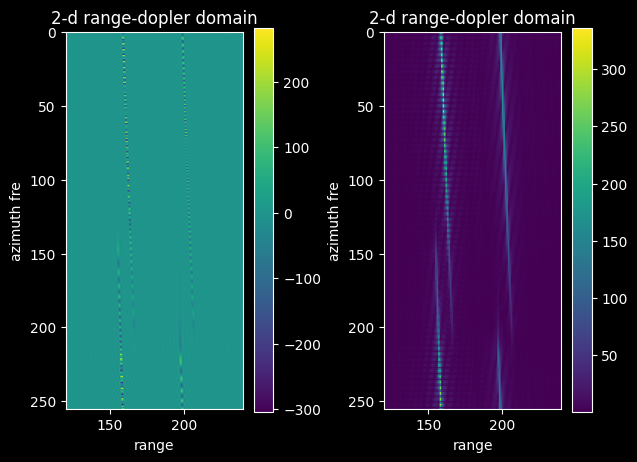

In [21]:
S_rdf = sf.fft(S_mf,N_azimuth_fft,axis=0)
# f_azi = sf.fftfreq(N_azimuth_fft,1/Fa)
f_azi = np.fft.fftshift(np.linspace(-Fa/2, Fa/2 - Fa/N_azimuth_fft, N_azimuth_fft))
f_azi = f_azi + np.round((-f_azi+f_etac)/Fa)*Fa

# f_azi = f_azi + np.round((f_etac)/Fa)*Fa
plt.figure()
plt.subplot(1,2,1)
plt.imshow((np.real(S_rdf)))
plt.title('2-d range-dopler domain')
plt.xlabel('range')
plt.ylabel('azimuth fre')
plt.colorbar()
plt.xlim(120,240)
plt.ylim(N_azimuth_fft-1,0)

plt.subplot(1,2,2)
plt.imshow((np.abs(S_rdf)))
plt.title('2-d range-dopler domain')
plt.xlabel('range')
plt.ylabel('azimuth fre')
plt.colorbar()
plt.xlim(120,240)
plt.ylim(N_azimuth_fft-1,0)
plt.tight_layout()
plt.show()

RCMC

In [22]:
range_pixel = sc.c/Fr/2
range_shift = (R_eta_A.max()-R_eta_A.min())/range_pixel
print('range_pixel',range_pixel)
print('RCM_total:',range_shift)
# tau = np.linspace(-T_rg/2,T_rg/2 - T_rg/N_rg,N_rg) 
tau_fft = np.linspace(-T_rg/2,T_rg/2 - T_rg/N_range_fft, N_range_fft) 
tau_array = tau_fft + 2*R_etac/sc.c
R0_tau = tau_array*sc.c/2* np.cos(theta_rc)
R0_tau = R0_tau.flatten()
# print(R0_tau.shape, f_azi.shape)
RCM_Q  = (sc.c/f0)**2*R0_tau.reshape(1,len(R0_tau))/(8*Vr**2)*f_azi.reshape(len(f_azi),1)**2
# print('Reta:',R_etac,'R0:',R_0)
# print('1',RCM_Q)
RCM_Q = (R_0 + RCM_Q - R_etac)/range_pixel   #矫正至R_etaC处 : R' - R0 = RCM, R'- R_etaC = RCM + R0 -R_etaC
# print('2',RCM_Q )
print(RCM_Q.max())


range_pixel 2.498270483333333
RCM_total: 8.810205418537013
5.400782606458347


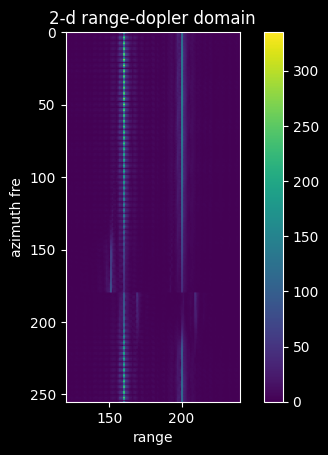

In [23]:

# print(RCM_Q)
interp_num = 8
interp_step = 16
# interp_pos = np.linspace(0,1-1/interp_step,interp_step)
interp_pos = np.linspace(0,1-1/interp_step,interp_step)
interp_ind = np.arange(-interp_num/2,interp_num/2,1)
interp_xvalue = interp_ind.reshape(1,interp_num) - interp_pos.reshape(interp_step,1)
interp_sinc = np.sinc(interp_xvalue)
window = ss.get_window(window=('kaiser',0),Nx=interp_num).reshape(1,interp_num)
interp_sinc *= window
interp_sinc /= np.sum(interp_sinc, axis=1, keepdims=True) 
# print(interp_xvalue)
S_rdf_c = np.zeros_like(S_rdf)
N_pad = 128
S_rdf_pad = np.zeros([S_rdf.shape[0],N_pad+S_rdf.shape[1]],dtype=np.complex128)
S_rdf_pad[:,0:int(N_pad/2)] = 0
S_rdf_pad[:,S_rdf.shape[1]+int(N_pad/2):N_pad+S_rdf.shape[1]] = 0
S_rdf_pad[:,int(N_pad/2):S_rdf.shape[1]+int(N_pad/2)] = S_rdf
for i in range(RCM_Q.shape[0]):
    for j in range(S_rdf_c.shape[1]):
        points = int(np.floor(RCM_Q[i,j]))
        offset = int(np.round((RCM_Q[i,j] - np.floor(RCM_Q[i,j]))*interp_step))

        # points = int(np.ceil(RCM_Q[i,j]))
        # offset = int(np.round((points - RCM_Q[i,j])*interp_step))

        # print('1:','points:',points,'offset',offset)
        points += offset//interp_step
        offset = np.remainder(offset,interp_step)
        # print('2:','points:',points,'offset',offset,'RCM:',RCM_Q[i,j])
        # print('points',points,interp_sinc[offset,:])
        S_rdf_c[i,j] = np.sum(S_rdf_pad[i,int(N_pad/2)+j+points-int(interp_num/2):int(N_pad/2)+j+points+int(interp_num/2)]*interp_sinc[offset,:])
plt.figure()
plt.imshow((np.abs(S_rdf_c)))
plt.title('2-d range-dopler domain')
plt.xlabel('range')
plt.ylabel('azimuth fre')
plt.colorbar()
plt.xlim(120,240)
plt.ylim(N_azimuth_fft-1,0)
plt.show()

方位向压缩

R0_A: 19963.96754154845 R0_B: 19963.96754154845 R0_C: 20063.96754154845
1.0050090243731304


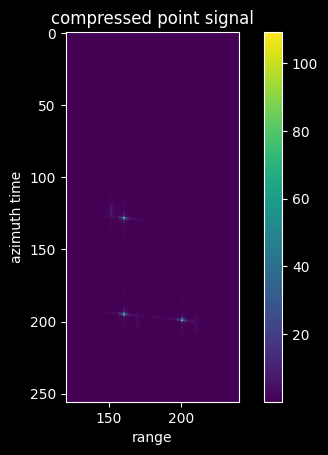

-800.0


In [ ]:
print('R0_A:',R_0,'R0_B:',R_0_B,'R0_C:',R_0_C)
print(R_0_C/R_0)
# Ka = 2 * Vr**2 * np.cos(theta_r_c)**2 / (lambda_r * r_tauX)
Ka = (2*Vr**2* np.cos(theta_rc)**2*f0/sc.c/R0_tau).reshape(1,len(R0_tau))
#1 不考虑Haz与Haf_offset，ifft(fft(S_mf_2))的中心与S_2d的点目标中心一致
#2 Haz引入了额外的线性相位，原因在于Haz将物体压缩至零多普勒时刻，而图像成像在eta+eta_c的方位向时间轴下
#3 ifft(F(f)*Haf_offset) = f(t - eta_c), 对于t = eta_c, f(t - eta_c) = f(0),此时恰好位于景中心
Haz = np.exp(-1j*np.pi*(f_azi.reshape(len(f_azi),1))**2 /Ka)
Haf_offset = np.exp(-1j*2*np.pi*(f_azi.reshape(len(f_azi),1))*eta_c)  

# S_mf_2 = sf.ifft(S_rdf_c*Haz*Haf_offset,axis=0)
S_mf_2 = sf.ifft(S_rdf_c*Haz,axis=0)

# S_mf_2 = sf.ifft(S_rdf_c*Haz,axis=0)
# S_mf_2 = sf.ifft(S_rdf_c*1,axis= 0)
plt.figure()
plt.imshow((np.abs(S_mf_2)))
plt.title('compressed point signal')
plt.xlabel('range')
plt.ylabel('azimuth time')
plt.colorbar()
plt.xlim(120,240)
# plt.ylim(N_azimuth_fft-1,50)
plt.show()
print(eta_c/(T_az/N_az))

200 199


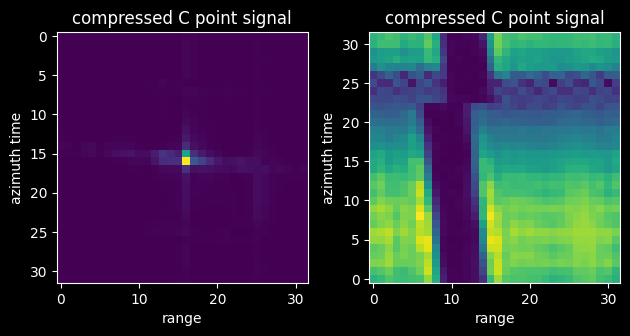

In [25]:
C_compoint_range = S_mf_2[:,180:230]
com_center_y,com_center_x = np.abs(C_compoint_range).argmax()//50,180 + np.remainder(np.abs(C_compoint_range).argmax(),50)
print(com_center_x,com_center_y)

C_point = S_mf_2[com_center_y-16:com_center_y+16,com_center_x-16:com_center_x+16]
plt.figure()
plt.subplot(1,2,1)
plt.imshow((np.abs(C_point)))
plt.title('compressed C point signal')
plt.xlabel('range')
plt.ylabel('azimuth time')

plt.subplot(1,2,2)
plt.imshow(np.abs(sf.fft2(C_point)))
plt.title('compressed C point signal')
plt.xlabel('range')
plt.ylabel('azimuth time')
bottom,top = plt.ylim()
plt.ylim(top,bottom)

plt.tight_layout()
plt.show()

In [26]:
# plt.figure()
# plt.subplot(1,2,1)
# plt.plot(range(32),np.abs(C_point[:,16]))
# plt.title('compressed C point signal')
# plt.xlabel('range')
# plt.ylabel('azimuth time')

# plt.subplot(1,2,2)
# plt.plot(range(32),np.abs(sf.fft(C_point[:,16])))
# plt.title('compressed C point signal')
# plt.xlabel('range')
# plt.ylabel('azimuth time')

16 upsampling

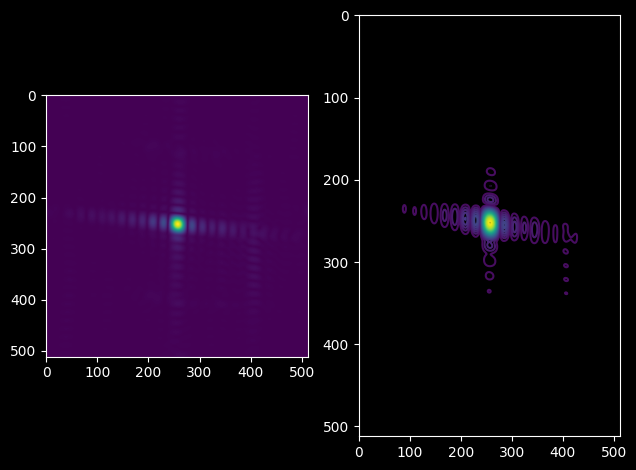

In [27]:
K = 16
N = 32
C_2ft = sf.fft2(C_point)
C_rp_fft = np.zeros([N,K*N],dtype=np.complex128)
for i in range(N):
    x_min = np.argmin(np.abs(C_2ft[i,:]))
    C_rp_fft[i,0:x_min] = C_2ft[i,0:x_min]
    C_rp_fft[i,K*N-(N-x_min):K*N] = C_2ft[i,x_min:N]

C_rp_fft_u = np.zeros([K*N,K*N],dtype=np.complex128)
for j in range(K*N):
    y_min = np.argmin(np.abs(C_rp_fft[:,j]))
    C_rp_fft_u[0:y_min,j] = C_rp_fft[0:y_min,j]
    C_rp_fft_u[K*N-(N-y_min):K*N,j] = C_rp_fft[y_min:N,j]
c_ups = sf.ifft2(C_rp_fft_u )
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.abs(c_ups))
# plt.xlim(128,128+256)
# plt.ylim(128,128+256)

plt.subplot(1,2,2)
plt.contour((np.linspace(0,K*N,K*N)),(np.linspace(0,K*N,K*N)),\
             np.abs(c_ups),levels = 40)
# plt.xlim(128,128+256)
bottom,top = plt.ylim()
plt.ylim(top,bottom)
# plt.contour((np.linspace(0,K*N,K*N))[int(K*N/2-N):int(K*N/2+N)],(np.linspace(0,K*N,K*N))[int(K*N/2-N):int(K*N/2+N)],\
#             np.abs(x_pad[int(K*N/2-N):int(K*N/2+N),int(K*N/2-N):int(K*N/2+N)]))
# plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()

252 257


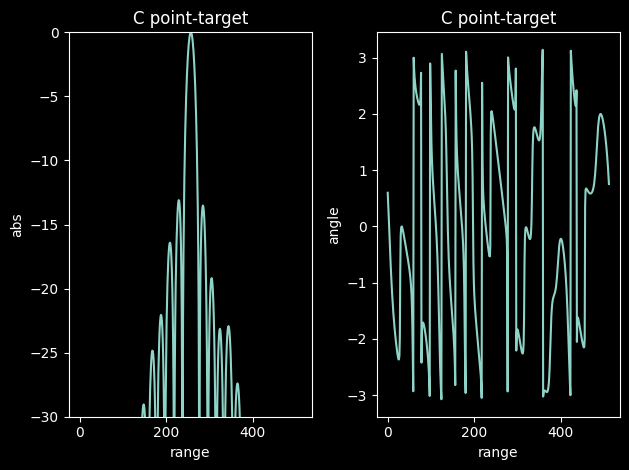

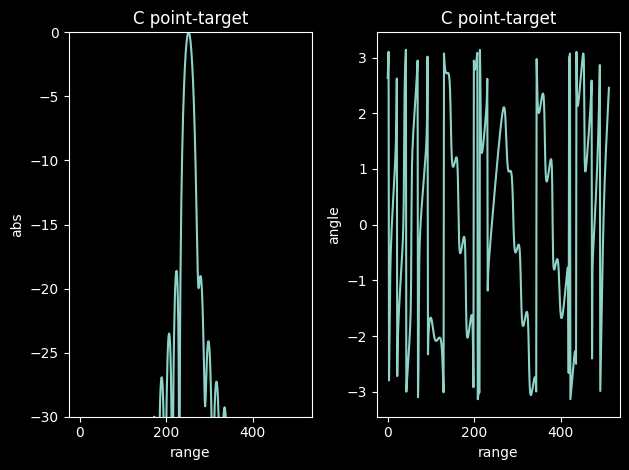

In [28]:
C_up_centery,C_up_centerx = np.abs(c_ups).argmax()//c_ups.shape[1], \
                            np.remainder(np.abs(c_ups).argmax(),c_ups.shape[1])
print(C_up_centery,C_up_centerx)



plt.figure()
plt.subplot(1,2,1)
plt.plot(20*np.log10((np.abs(c_ups[C_up_centery,:]))/np.max(np.abs(c_ups[C_up_centery,:]))))
plt.title('C point-target')
plt.xlabel('range')
plt.ylabel('abs')
# plt.xlim(center_x-10,center_x+10)
plt.ylim(-30,0)

plt.subplot(1,2,2)
plt.plot((np.angle(c_ups[C_up_centery,:])))
plt.title('C point-target')
plt.xlabel('range')
plt.ylabel('angle')
plt.tight_layout()
plt.show()

C_up_point_az = c_ups[:,C_up_centerx]
plt.figure()
plt.subplot(1,2,1)
plt.plot(20*np.log10((np.abs(C_up_point_az))/np.max(np.abs(C_up_point_az))))
plt.title('C point-target')
plt.xlabel('range')
plt.ylabel('abs')
plt.ylim(-30,0)


plt.subplot(1,2,2)
plt.plot((np.angle(C_up_point_az)))
plt.title('C point-target')
plt.xlabel('range')
plt.ylabel('angle')

plt.tight_layout()
plt.show()